In [175]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import nngt
import nest

In [176]:
nngt.get_config()

{'backend': 'networkx',
 'mpi': False,
 'msd': 3215628934,
 'multithreading': True,
 'omp': 1,
 'seeds': None,
 'use_database': False,
 'version': '1.1.1',
 'with_nest': 'NEST 2.16.0',
 'with_plot': True}

In [177]:
neur = nngt.NeuralGroup(nodes = 50,neuron_model="iaf_psc_alpha")

pop = nngt.NeuralPop.from_groups([neur], ["neurons"])#syn_spec={'model': 'tsodyks2_synapse'})

net = nngt.generation.distance_rule(20,population=pop,avg_deg=10)

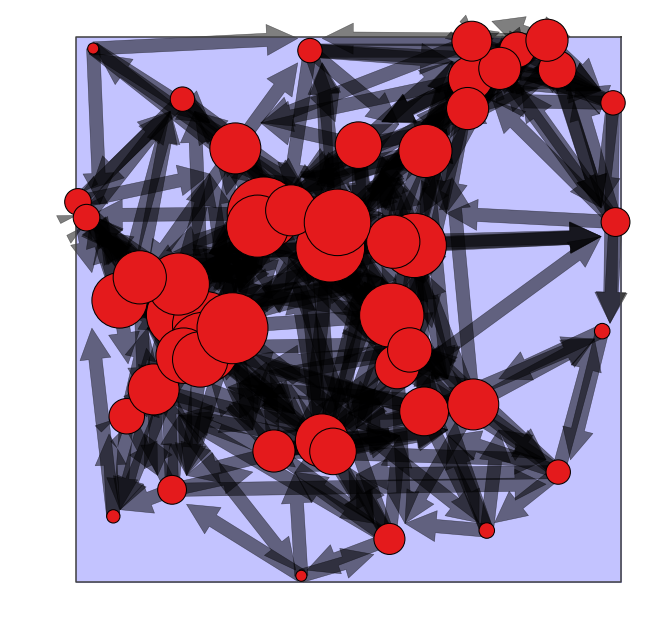

In [179]:
nngt.plot.draw_network(net)

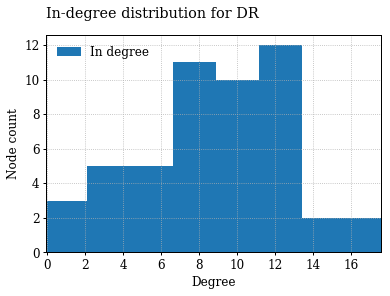

In [180]:
nngt.plot.degree_distribution(net,deg_type="in")

In [181]:
np.mean(net.get_degrees("in"))

10.0

In [195]:
if nngt.get_config('with_nest'):
    
    '''
    Prepare the network and devices.
    '''
    nest.ResetKernel()
    # send to NEST,
    gids = net.to_nest()
    # excite
    nngt.simulation.set_poisson_input(gids, rate=7000.)
    # record
    groups = [key for key in net.population]
    recorder_spike, record_spike = nngt.simulation.monitor_groups(groups, net)
    recorder_vm, record_vm       = nngt.simulation.monitor_groups(groups,net,nest_recorder="multimeter",params={"withtime":True, "record_from":["V_m"] })
    
    '''
    Simulate and plot.
    '''
    simtime = 1000.
    nest.Simulate(simtime)

   # if nngt.get_config('with_plot'):
       # nngt.simulation.plot_activity(recorder, record, network=net, show=True, hist=False,limits=(0,simtime))
        #z = nngt.simulation.plot_activity(gid_recorder=recorder,network=net,record=record)
        

In [196]:
print(gids)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50)


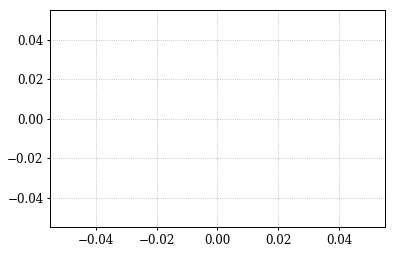

In [197]:
dmm0 = nest.GetStatus(recorder_spike[0])[0]
Vms1 = dmm0["events"]["senders"]
ts1 = dmm0["events"]["times"]
plt.figure()
plt.plot(ts1,Vms1,'.')
#plt.plot(ts2,Vms2,'-.')

In [203]:
dmm2 = nest.GetStatus(recorder_vm[0])[0]
Vms2 = dmm2["events"]["V_m"]
ts2 = dmm2["events"]["times"][::50]

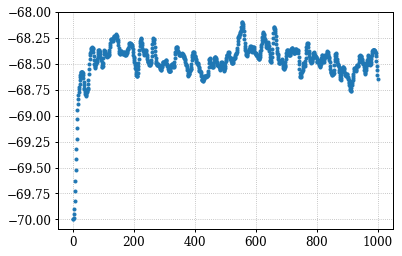

In [199]:
plt.plot(ts2[0:20000],Vms2[0:20000],'.')

In [204]:
print(Vms2.shape)

(49950,)
